# River Profiles Lab
Geomorphic systems tend to develop slowly relative to the timescale of a human life. One way in which we can understand how landscapes change over longer timescales is to use observations of topography as a record of past and ongoing geomorphic change. In the lecture today we discussed how river long profiles can be used to explore how rivers incise in response to changes in uplift, and therefore erosion. In this lab you will apply some simple mathematical representations of river profiles to hlp you undersstand the controls on river profile morphology. This notebook allows you to play around with a simple model of a river profile to explore how changing parameters such as uplift rate and erodibility affect profile morphology. 

*These labs are developed based on lessons originally written by Simon M. Mudd at the University of Edinburgh and Fiona Clubb at Durham University, and modified by Martin Hurst at University of Glasgow.*

The exercise is written in the Python computer programming language, but you don't need any prior knowledge of computer programming. The aims of this lab are:
* To be able to interpret plots of drainage area and slope, drainage area and length, and length and slope.
* To derive a basic equation for an "ideal" channel longitudinal profile. 
* To explore how changing parameters in the steady-state profile equation affect river profile morphology.

You can save figures as you go along for your own notes, and if you cant recall how to change the colours of lines or similar just ask.

### Python
The programming language we are using in this lab is called Python. No prior knowledge of programming is required for this lab. Learning how to be a programmer is not the aim! However, this sort of scientific computing is becoming more common place in research and consultancy, so it won't do you any harm to see it in action. Python is multifunctional, for example it can interface with QGIS (software we will use un future labs) to automate workflows.

This notebook file is split into blocks of text and blocks of code. **To run a code block, click in a cell, hold down shift, and press enter.** An asterisk in square brackets `In [*]:` will appear while the code is being executed, and this will change to a number `In [1]:` when the code is finished. *The order in which you execute the code blocks matters, they must be run in sequence.* If you run into any errors, click the "Kernel" menu at the of the page and then "Restart & Clear Output" and then run everything again from the top. 

Inside blocks of python code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along. 

Before we get started we need to tell python which tools we want to use (these are called modules):

In [1]:
# import modules
# this one is for making graphs
import matplotlib.pyplot as plt 
# this one is for doing numerical stuff
import numpy as np 

## Basic properties of channel profiles
Imagine yourself in a nice mountain valley walking along a stream. You start quite low in the valley. The stream is nice and wide. As you go upstream the river gets smaller. This is because it is draining less area. In addition, the stream will probably change its gradient. Near the mountain tops, channels tend to get steeper. Because channels tend to get steeper as we move along them, we can call their profiles concave. There are exceptions, but the general trend of rivers is to get steeper as you go upstream. 
### Area - gradient relationship
In the 1950's and 60's people started measuring how steep rivers were as a function of their drainage area (there is a classic 1957 paper by Hack on this topic). In 1962 Marie Morisawa realised that the relasionship between drainage area and gradient followed a power law. 

The power law can be described by:

$S = k_s A^{-\theta}$

Some authors now refer to this as "Flint's Law", because of a 1974 paper by Flint where he went into a lot of details about this relationship, but it really should be called "Morisawa's law" since she was the first one to notice it. 

The symbols above are the ones used in loads of papers. $S$ is slope (or gradient), $A$ is drainage area, $k_s$ is something called the "steepness index" and $\theta$ is called the concavity index. 

We can look at how these affect potential slopes with a bit of python.

In [2]:
# set up some values for drainage area ranging from 10^3 up to 10^6 in 10^0.25 increments
logA = np.arange(3,6.01,0.25)

# convert log values to actual drainage areas
A = 10**logA

# print for comparison
print(logA,A)

[3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ] [   1000.            1778.27941004    3162.27766017    5623.4132519
   10000.           17782.79410039   31622.77660168   56234.13251903
  100000.          177827.94100389  316227.76601684  562341.32519035
 1000000.        ]


Now I plot the slopes and areas. You should play with this by changing the $k_s$ and $\theta$ parameters to see what happens. Note how the plot has logarithmic spacing on the axes. We use logarithmic spacing when our data covers a big range of values. 

For some indication: 
* $k_s$ typically varies between 1 and 1000 (when $\theta$ is 0.45).
* $\theta$ typically varies between 0.3 and 0.65

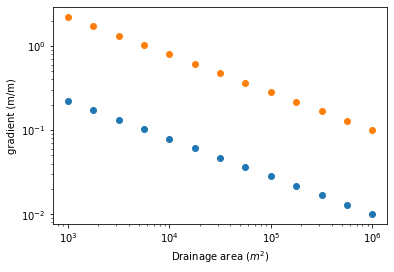

In [3]:
k_s1 = 5
theta1 = 0.45
S1 = k_s1*A**(-theta1)

k_s2 = 50
theta2 = 0.45
S2 = k_s2*A**(-theta2)

plt.scatter(A,S1)
plt.scatter(A,S2)
plt.xlabel("Drainage area ($m^2$)")
plt.ylabel("gradient (m/m)")
plt.yscale('log')
plt.xscale('log')

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK 1</h3>
<p> Change the values of $k_s$ and $\theta$ in the plots above to see how they affect the relationship between drainage area and gradient. For a reference, a gradient of 0.1 is **very** steep for a river. You will probably transition to channels dominated by debris flows at this gradient (e.g. Stock and Dietrich, 1998).
</ol>
</p>
<p></p>
</font>
</div>

### Longitudinal profiles
Another observation of channel profiles was made by Hack, where he noted that drainage area and stream length could be related by a power law. This is (rightfully) called Hack's law. He wrote this as 

$L = c A^h$

where $L$ is the length of a basin and $c$ and $h$ are some empirical constants.  

Drainage area will get bigger as you go downstream. But this is a little bit annoying for my purposes so I am going to write this as a distance upstream from an outlet. 

$A = (x_0 - x)^b$

where $x_0$ is the distance from the source to the outlet (basically the same as $L$ but I have chosen a specific outlet) and $b = 1/h$. 

We can plug this equation into Morisawa's law to get:

$S = k_s (x_0 - x)^{-b \theta}$

Slope, however, is the same as the derivative of elevation, $dz/dx$. I will not bore you with the details, but this a differential equation that can be solved. The solution is:

$z = \frac{k_s \left(x (x_0-x)^{-b \theta }-x_0 (x_0-x)^{-b \theta }+x_0^{1-b \theta }\right)}{1-b \theta }$

We can plot this using python. First we define a function to get the elevations (this is just a python version of the equation above). 

In [4]:
def channel_profile(x,ks,theta,b,x0):
    z = []
    term1 = 1-b*theta
    term2 = -b*theta
    for xi in x:
        this_z = ks*( xi*(x0-xi)**term2 - x0*(x0-xi)**term2+ x0**(term1))/(term1)
        z.append(this_z)
    return np.asarray(z)

Now, we can plot. Try manipulating the parameters. Typical ranges of $\theta$ and $k_s$ are listed above. 

* $b$ will range from around 1.8 to a little over 2
* $x_0$ is the length of the channel, so anywhere from a few km (you input this in m) to 50 km. 

Text(0, 0.5, 'elevation (m)')

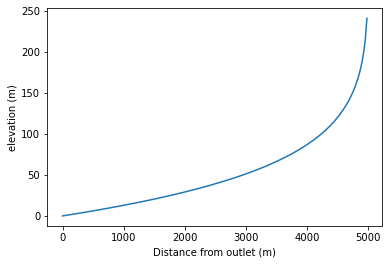

In [5]:
# x0 needs to be in metres!!
x0 = 5000
ks = 25
theta = 0.45
b = 2
x = np.arange(0,x0,25)
z = channel_profile(x,ks,theta,b,x0)


plt.plot(x,z)
plt.xlabel("Distance from outlet (m)")
plt.ylabel("elevation (m)")

#print(z)

Okay, so by now you should have a basic understanding of what channel long profiles look like!

This is all rather simplified. The main thing we have missed out on when considering slope and the long profile is that river drainage area, is not smoothly increasing. At tributary junctions you get a jump in drainage area. So typical river profiles are not quite as smooth as the plot above. But this is not far off a well-behaved river. And by well behaved I mean that it is flowing over the same type of rocks, and there erosion rate has been steady (that is, not varying) for a really long time. 

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK 2</h3>
<p> Change the values of $k_s$, $b$, $x_0$, and $\theta$ in the plots above to see how they affect the channel long profile.</p>
</font>
</div>

# Part 2: Stream Power

Now that we have seen the basic form of channel profiles (see Part 1), we can start thinking about what might cause this form.

Nearly two hundred years ago, there was something of a raging debate as to whether or not rivers could carve valleys. One of the most important figures in the history of geomorphology, G.K. Gilbert, wrote a highly influential report on the Geology of the Henry Mountains (a range in Utah) that not only contributed to a number of geophysical ideas (isostasy, for one), but also contained a chapter on erosion that expounded on erosion of channels by water. 

Gilbert, G.K., 1877. Geology of the Henry Mountains (USGS Unnumbered Series), Geology of the Henry Mountains, Monograph. Government Printing Office, Washington, D.C. https://doi.org/10.3133/70038096

You can get this report online. Every geomorphologist should read chapter 5.Gilbert's chapter is modern. What I mean by that is his approach and his speculations would not seem out of place in a paper appearing today. If you look at other papers from this paper they can seem quite dated. Gilbert was far ahead of his time. Which is particularly notable because his approach to things fell out of favour for a number of decades and didn't really find traction again until the late 50s and early 60s (With the exception of the, uh, exceptional papers by R.E. Horton in the 30s and 40s, but we won't get into those here). 

Gilbert says on page 115: "We have already seen that erosion is favoured by declivity. Where the declivity is great the agents of erosion are powerful; where it is small they are weak; where there is no declivity they are powerless. Moreover it has been shown that their power increases with the declivity in more than simple
ratio.” That last bit means that the relationship between declivity (we would say gradient) and erosion rate is *nonlinear*.  

We can also suppose that erosion is favoured when there is more water. And to get more water, you need more drainage area. We can state this in a very simple equation, which is exactly what Howard and Kirby did in 1983:

$E = k A^m S^n$

where $E$ is the erosion rate, $A$ is drainage area, $S$ is channel gradient, $m$ and $n$ are empirical coefficients, and $k$ is a lumped "erodibility" that is a Pandora's box of complexity.  

The equation above is often called the "stream power law". It is a *MASSIVE* oversimplification of what happens during river incision. It is oversimplified to the degree that many geomorphologists think it is obscene. But it is a useful conceptual model that has helped informed many studies. There are a number of studies showing that in the right circumstances, it can be used to understand how channels evolve. So we are going to use it here. 

## Stream power warnings

* Stream power is designed for channels that incise through bedrock. If the channel is alluvial (that is, its bed and banks are made of sediment, even in the biggest floods), then stream power does not apply.
* In reality, river incision into bedrock depends on many factors. With a few exceptions, water alone does not erode the bed, so more advanced incision rules include sediment supply. 
* Usually, small discharges don't really modify the bed: you need to get beyond a threshold discharge to incise. So more advanced incision laws take this into account. 
* Stream power is used mainly because it is simple, and gives predictions that have been observed in nature (for example, the power law relationship between slope and drainage area), rather than because it accurately describes any physical process.

With those caveats, said, there is some good news:
* It occasionally works (e.g., Lague, 2014; Schwanghart and Scherler 2020, although the Lague paper also has examples of where it doesn't work). 
* Lots of nasty thresholding behaviour (e.g., sediment cover thresholds, discharge thresholds for incision) can be mimicked by altering the $n$ exponent (see Gasparini and Brandon, 2011). 

## Steady state

Another concept you should be aware of is the concept of "steady state". Steady state means that something is not changing in time. You could have various forms of this. Hack (1960) suggested that channels in the Appalachians were eroding at a rate that matched long term uplift, and so the surface topography was in a steady state. This concept has proven quite useful over the years: it can help us understand what a channel might look like if uplift stayed the same for a very, very long time. We can then compare that form to actual channels and see if they have been perturbed, and maybe make some assumptions about the nature of that perturbation. To start, we will use this assumption:

$U = E$

$U = k A^m S^n$

We can rearrange this a bit to isolate slope:

$S = \big(\frac{U}{k}\big)^{1/n} A^{-m/n}$

Does that look familiar? Remember Morisawa's law?

$S = k_s A^{-\theta}$

By comparing these two equations you can relate the concavity index, $\theta$, to the ratio of $m$ and $n$, and the channel steepness index, $k_s$, to a ratio between $U$, the uplift rate, and $k$, the erodibility. 

So the steady state predictions of the stream power model are basically the same as the channel profiles predicted by Morisawa's law that we say in the previous lesson. 

## The channel toy
Simon Mudd at Edinburgh has  made a little python package called `channeltoy` to look at a channel that incises through rocks following the stream power law. You can play with the stream power parameters and see what happens when, say, uplift rates change. We can use this to get some insight into how a channel might react to landscape perturbations. 

First we need to install the package and then import a few other tools.

In [6]:
!pip install channeltoy
import channeltoy as ct

We can create a channel with some parameters. Then we call a function to plot the channel at steady state. 
The spacing is in metres (this is the spacing of points in the channel where I solve the stream power law).
The uplift is in m/yr. 
* U = 0.001 m/yr is very fast. Only extreme places like Taiwan have uplift rates faster than this.
* U = 0.0001 - 0.0002 m/yr is the kind of rate you might find in a mountain range that isn't particularly active. Like the Carpathians or the Appalachians.  
* U = 0.00001 m/yr would be in a place that has little relief and no tectonic activity. Some rolling hills on the African Craton, or hills in Australia, for example.

Note: when I say "uplift" here, this isn't really uplift. These are long term erosion rates that we think relate to uplift (see the steady state section). If you measure short term uplift rates using GPS you can get quite high rates, in many place much higher than the long term erosion rates. We are still trying to understand this discrepancy.  

K is: 5e-05
U is: 0.00025


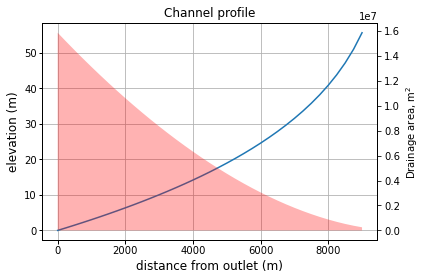

In [7]:
first_channel = ct.channeltoy(spacing=250, U = 0.00025, K = 0.00005, n=1, m= 0.45)
initial_elevation = first_channel.solve_steady_state_elevation()
first_channel.plot_ss_channel(show_figure = True, print_to_file = False,show_area=True)

The blue line is the river profile (elevation vs. distance), and the red shaded area shows you the area at each distance from the outlet. I am now going to change the uplift and see what the profile looks like:

U is: 0.001


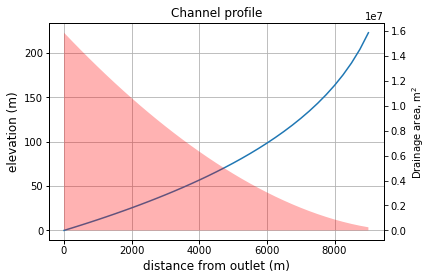

In [8]:
final_elevation = first_channel.set_U_values(U = 0.001)
first_channel.plot_ss_channel(show_figure = True, print_to_file = False,show_area=True)

We can extract data from channels so we can plot data directly to see what different channels look like. 

Some more parameters:
* `X_0`: the total length of the basin in metres.
* `maximum_x`: the maximum distance of the channel in metres. __IMPORTANT__ this has to be less than `X_0`!!

You can also set the exponent relating length and drainage area (see lesson 01). In this model we use `rho` for this. The default is 1.8, which is a fairly reasonable number, so you don't need to change it. 

K is: 5e-05
U is: 0.0001
K is: 5e-05
U is: 0.0002


Text(0, 0.5, 'elevation (m)')

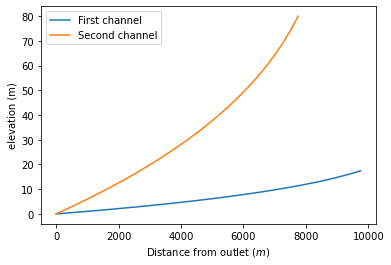

In [9]:
# Set up a first and second channel
first_channel = ct.channeltoy(spacing=250, U = 0.0001, K = 0.00005, n=1, m= 0.45,maximum_x = 10000,X_0 = 12000)

# I show here the setting of steady state but actually this happens automatically when you make a channel. 
initial_elevation = first_channel.solve_steady_state_elevation()

second_channel = ct.channeltoy(spacing=250, U = 0.0002, K = 0.00005, n=1, m= 0.4,maximum_x = 8000,X_0 = 9000)
second_channel.solve_steady_state_elevation() # This isn't really necessary but showing you how to reset a channel to steady state

# Get the data from the two channels
x1 = first_channel.x_data
z1 = first_channel.z_data
x2 = second_channel.x_data
z2 = second_channel.z_data

# Plot the channels
plt.plot(x1,z1,label="First channel")
plt.plot(x2,z2,label="Second channel")
plt.legend()

plt.xlabel("Distance from outlet ($m$)")
plt.ylabel("elevation (m)")

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK 3</h3>
<p> Play around with the parameters above to get a feeling for how much relief is generated for different erodibilites and uplift rates. 
    
Set $n$ = 1 and $m$ = 0.45. Use an uplift rate of 0.0005 m/yr and 0.0002 m/yr. What are values of K that give realistic relief? You can go on Google earth to see how long channels are in big mountain ranges and how much relief they have. 
</p>
</font>
</div>

## References
Hack, J., 1957. Studies of longitudinal profiles in Virginia and Maryland (U.S. Geological Survey Professional Paper No. 294- B). United States Government Printing Office, Washington, D.C.

Morisawa, M., 1962. Quantitative Geomorphology of Some Watersheds in the Appalachian Plateau. Geol. Soc. Am. Bull. 73, 1025–1046. https://doi.org/10.1130/0016-7606(1962)73[1025:QGOSWI]2.0.CO;2

Howard, A.D., Kerby, G., 1983. Channel changes in badlands. GSA Bulletin 94, 739–752. https://doi.org/10.1130/0016-7606(1983)94<739:CCIB>2.0.CO;2

Whipple, K.X., Tucker, G.E., 1999. Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research: Solid Earth 104, 17661–17674. https://doi.org/10.1029/1999JB900120

Gasparini, N.M., Brandon, M.T., 2011. A generalized power law approximation for fluvial incision of bedrock channels. Journal of Geophysical Research: Earth Surface 116. https://doi.org/10.1029/2009JF001655

Lague, D., 2014. The stream power river incision model: Evidence, theory and beyond. Earth Surface Processes and Landforms 39, 38–61. https://doi.org/10.1002/esp.3462

Schwanghart, W., Scherler, D., 2020. Divide mobility controls knickpoint migration on the Roan Plateau (Colorado, USA). Geology 48, 698–702. https://doi.org/10.1130/G47054.1

